<a href="https://colab.research.google.com/github/carvalheiracarlos/Speaker-Recognition-DIM0494/blob/main/train_stats_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/carvalheiracarlos/Speaker-Recognition-DIM0494/main/callbacks/metrics.csv'
predictions_url = 'https://raw.githubusercontent.com/carvalheiracarlos/Speaker-Recognition-DIM0494/main/callbacks/predictions.csv'

In [3]:
metrics = pd.read_csv(url)
eval = pd.read_csv(predictions_url)

In [4]:
metrics.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
epoch,100.0,49.500000,29.011492,0.000000,24.750000,49.500000,74.250000,99.000000
categorical_accuracy,100.0,0.898054,0.148448,0.088357,0.903971,0.950317,0.964355,0.972199
loss,100.0,0.346930,0.595595,0.083293,0.111144,0.156762,0.291439,4.044596
val_categorical_accuracy,100.0,0.805440,0.117361,0.058862,0.812581,0.835382,0.849288,0.864166
val_loss,100.0,0.854677,0.480674,0.626372,0.723470,0.757033,0.801214,4.197947


In [5]:
eval.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1568.0,783.500000,452.786926,0.0,391.75,783.5,1175.25,1567.0
predictions,1568.0,45.214286,26.373780,0.0,22.00,46.0,67.25,89.0
true_labels,1568.0,45.179209,26.518066,0.0,22.00,46.0,68.00,89.0


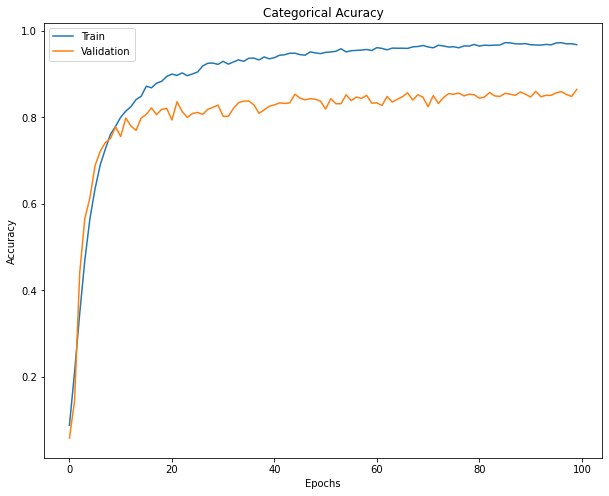

In [6]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = plt.plot(metrics['categorical_accuracy'], label='Train')
ax = plt.plot(metrics['val_categorical_accuracy'], label='Validation')
ax = plt.xlabel('Epochs')
ax = plt.ylabel('Accuracy')
ax = plt.title('Categorical Acuracy')
ax = plt.legend()

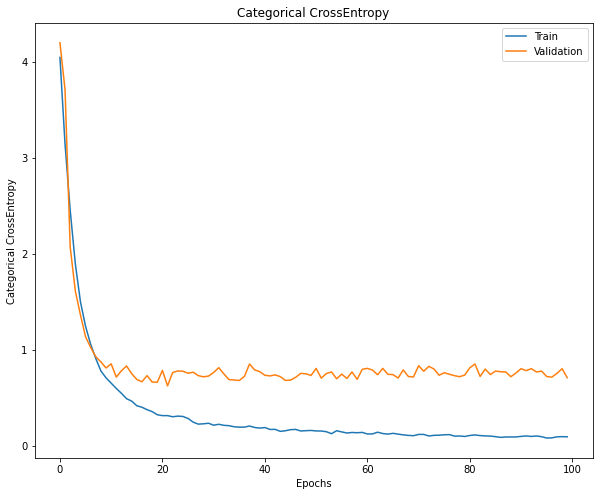

In [7]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = plt.plot(metrics['loss'], label='Train')
ax = plt.plot(metrics['val_loss'], label='Validation')
ax = plt.xlabel('Epochs')
ax = plt.ylabel('Categorical CrossEntropy')
ax = plt.title('Categorical CrossEntropy')
ax = plt.legend()

In [8]:
print(classification_report(eval.predictions, eval.true_labels))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88        39
           1       0.96      0.87      0.92        31
           2       0.80      1.00      0.89         4
           3       0.79      0.79      0.79        29
           4       0.53      1.00      0.70         8
           5       0.79      0.92      0.85        24
           6       0.87      0.96      0.92        28
           7       1.00      0.67      0.80         6
           9       0.57      0.81      0.67        16
          11       0.67      0.80      0.73        10
          12       0.89      0.89      0.89        18
          13       0.40      0.67      0.50         3
          14       0.67      1.00      0.80         6
          15       1.00      0.96      0.98        23
          16       0.93      0.96      0.95        28
          17       1.00      0.91      0.95        11
          18       0.79      0.65      0.71        23
          19       0.60    

In [9]:
cm = confusion_matrix(eval.predictions, eval.true_labels)

Text(0.5, 1.0, 'Confusion Matrix')

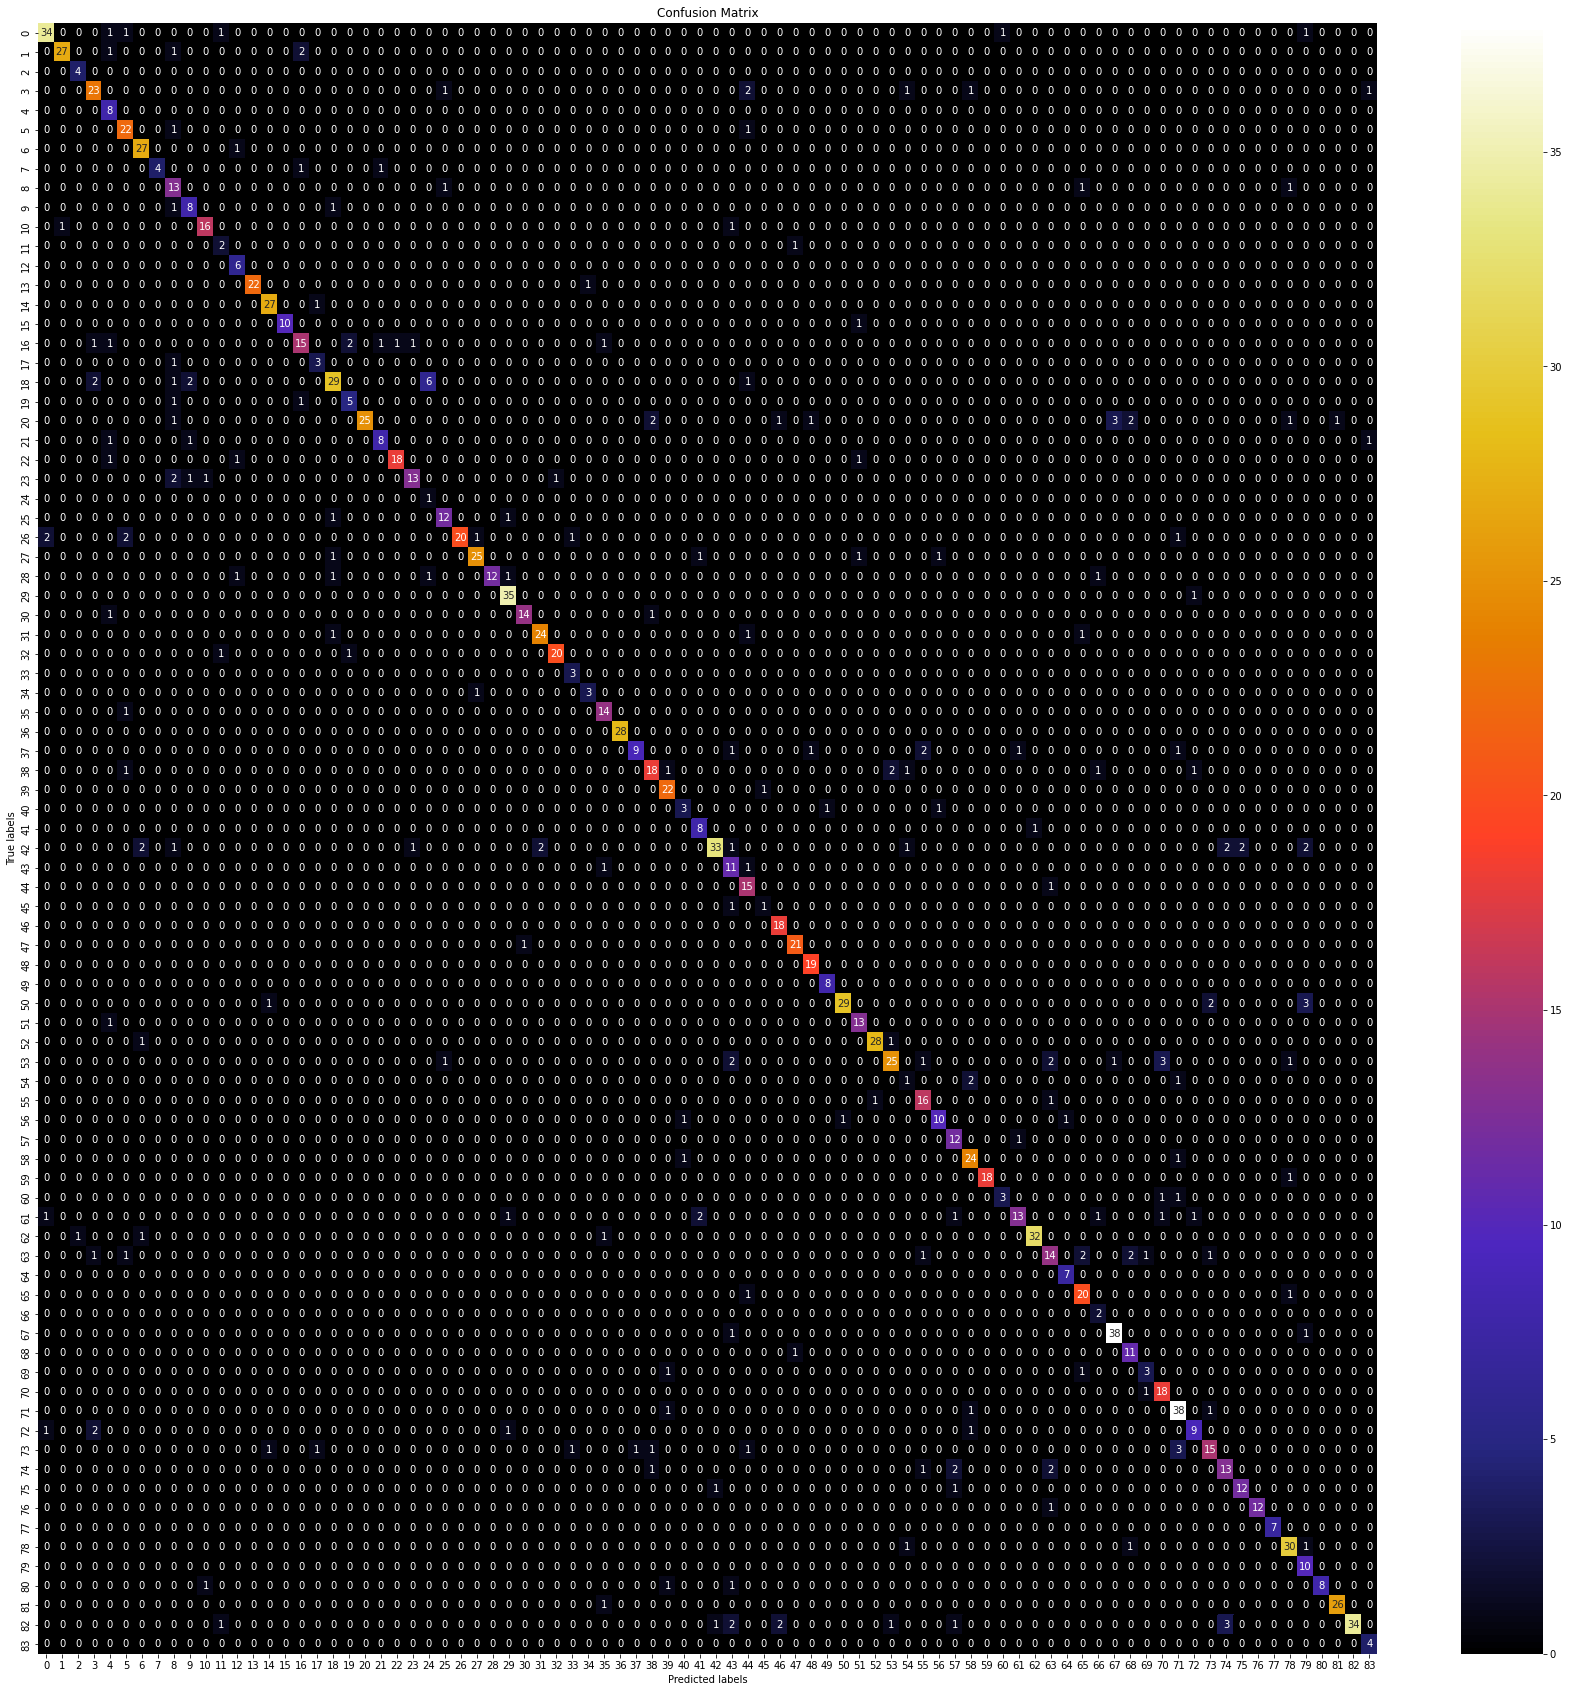

In [10]:
fig, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='CMRmap')
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')